# Identify Marine Heatwaves from High-resolution Daily SST Data

Marine ecosystems are strongly influenced by heatwaves, a kind of extreme climatic events. Marine heatwaves (MHWs), which can be caused by a combination of atmospheric and oceanographic processes, have a strong influence on marine ecosystem structure and function, including mass mortality of abalone, benthic habitat loss and altered human use of the ocean. MHWs have been observed around the world and are expected to increase in intensity and frequency under anthropogenic climate change(Oliver et al., 2017).

A general definition of MHW has been proposed by Hobday et al.(2016). A MHW is defined as a prolonged discrete anomalously warm water event that can be described by its duration, intensity, rate of evolution, and spatial extent. Specifically, an anomalously warm event is considered to be a MHW if it lasts for five or more days, with temperatures warmer than the 90th percentile based on a 30-year historical baseline period. 

The python module of [marineHeatWaves](https://github.com/ecjoliver/marineHeatWaves) implements the Marine Heatwave (MHW) definition proposed by Hobday et al. (2016). Moreover, the marineHeatWaves module provides three examples to show how to apply the MHW definition to observed SST records to identifies three historical MHWs: the 2011 Western Australia event, the 2012 Northwest Atlantic event, and the 2003 Mediterranean event. 

We take the 2011 Western Australia event from the original tutorial (Hobday et al., 2016) as an example and reproduce it in this notebook. The MHW took place during the austral summer of 2011 off Western Australia (the so-called 'Ningaloo Niño'). It was largely driven by atmospheric and oceanographic processes associated with the strong 2010/11 La Niña, which led to anomalous advection of warm tropical waters poleward into temperate regions (Feng et al., 2013; Benthuysen et al., 2014). This Western Australia MHW caused major shifts in benthic ecosystem structure and functioning in a tropical–temperate transition zone, through widespread mortality of cool-water habitat forming species (Wernberg et al., 2013; Smale and Wernberg, 2013), and impacted a valuable fishery (Caputi et al., 2015).

In this notebook, the NOAA 1/4° daily Optimum Interpolation Sea Surface Temperature (or daily OISST) is used to identify MHWs. The data is an analysis constructed by combining observations from different platforms (satellites, ships, buoys) on a regular global grid. A spatially complete SST map is produced by interpolating to fill in gaps. The methodology includes bias adjustment of satellite and ship observations (referenced to buoys) to compensate for platform differences and sensor biases (See more at https://www.ncdc.noaa.gov/oisst).

## 1. Load all needed libraries

In [1]:
%matplotlib inline

import numpy as np
from datetime import date
from matplotlib import pyplot as plt

# Load marineHeatWaves definition module
import marineHeatWaves as mhw

matplotlib inline


## 2. Load daily SST data

The daily time series of SST off Western Australia at the location of [112.5$^∘$E, 29.5$^∘$S] has been preprocessed over the **1982 to 2017** period in advance. This can be done using NCO, CDO, Matlab, or Python itself. The location is right at the center of domain [112.375~112.625$^∘$E, 29.375~29.625$^∘$S]. So the daily time series was produced from the nearest 4 grids over the domain using a bilinear interpolation method. The data is stored as a CSV file of sst_WA.csv.

In [2]:
sst = np.loadtxt('data/sst_WA.csv', delimiter=',')

# Generate time vector using datetime format (January 1 of year 1 is day 1)
t = np.arange(date(1982,1,1).toordinal(),date(2017,12,31).toordinal()+1)
dates = [date.fromordinal(tt.astype(int)) for tt in t]

## 3. Detect Marine Heatwave

The marineHeatWaves (mhw) module consists of a number of functions for the detection and characterization of MHWs. The main function is the detection function (detect) which takes as input a time series of temperature (and a corresponding time vector) and outputs a set of detected MHWs.

### 3.1 Detect
Run the MHW detection algorithm which returns the variable mhws, consisting of the detected MHWs, and clim, consisting of the climatological (varying by day-of-year) seasonal cycle and extremes threshold.

In [3]:
mhws, clim = mhw.detect(t, sst)

### 3.2 Check properties of MHWs


- The number of MHW events:

In [4]:
mhws['n_events']

63

- Maximum intensities (in  $^∘$C) of the first ten events

In [5]:
mhws['intensity_max'][0:10]

[1.3063388074291282,
 1.8981549364613919,
 2.2162890518084026,
 2.192166959921799,
 1.7839721407624651,
 1.613503030303029,
 1.7445267839687197,
 2.082578885630504,
 1.955544965786899,
 1.2661322580645198]

- Properties of the event with the largest maximum intensity

In [6]:
ev = np.argmax(mhws['intensity_max']) # Find largest event
print 'Maximum intensity:', mhws['intensity_max'][ev], 'deg. C'
print 'Average intensity:', mhws['intensity_mean'][ev], 'deg. C'
print 'Cumulative intensity:', mhws['intensity_cumulative'][ev], 'deg. C-days'
print 'Duration:', mhws['duration'][ev], 'days'
print 'Start date:', mhws['date_start'][ev].strftime("%d %B %Y")
print 'End date:', mhws['date_end'][ev].strftime("%d %B %Y")

Maximum intensity: 6.406016764418382 deg. C
Average intensity: 3.3332752688172045 deg. C
Cumulative intensity: 179.99686451612905 deg. C-days
Duration: 54 days
Start date: 07 February 2011
End date: 01 April 2011


## 4. Visualize

From the properties of the event with the largest maximum intensity, it can be found that it is the most famous 2011 MHW off WA. 

### 4.1 Plot the SST time series and have a closer look at the identified MHW event

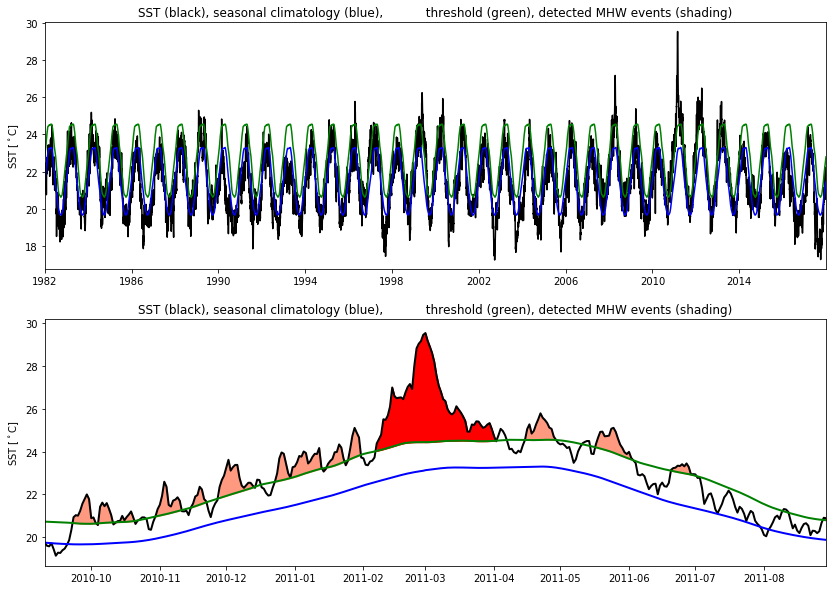

In [7]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
# Plot SST, seasonal cycle, and threshold
plt.plot(dates, sst, 'k-')
plt.plot(dates, clim['thresh'], 'g-')
plt.plot(dates, clim['seas'], 'b-')
plt.title('SST (black), seasonal climatology (blue), \
          threshold (green), detected MHW events (shading)')
plt.xlim(t[0], t[-1])
plt.ylim(sst.min()-0.5, sst.max()+0.5)
plt.ylabel(r'SST [$^\circ$C]')
plt.subplot(2,1,2)
# Find indices for all ten MHWs before and after event of interest and shade accordingly
for ev0 in np.arange(ev-10, ev+11, 1):
    t1 = np.where(t==mhws['time_start'][ev0])[0][0]
    t2 = np.where(t==mhws['time_end'][ev0])[0][0]
    plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], clim['thresh'][t1:t2+1], \
                     color=(1,0.6,0.5))
# Find indices for MHW of interest (2011 WA event) and shade accordingly
t1 = np.where(t==mhws['time_start'][ev])[0][0]
t2 = np.where(t==mhws['time_end'][ev])[0][0]
plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], clim['thresh'][t1:t2+1], \
                 color='r')
# Plot SST, seasonal cycle, threshold, shade MHWs with main event in red
plt.plot(dates, sst, 'k-', linewidth=2)
plt.plot(dates, clim['thresh'], 'g-', linewidth=2)
plt.plot(dates, clim['seas'], 'b-', linewidth=2)
plt.title('SST (black), seasonal climatology (blue), \
          threshold (green), detected MHW events (shading)')
plt.xlim(mhws['time_start'][ev]-150, mhws['time_end'][ev]+150)
plt.ylim(clim['seas'].min() - 1, clim['seas'].max() + mhws['intensity_max'][ev] + 0.5)
plt.ylabel(r'SST [$^\circ$C]')

Yep, It's certainly picked out the largest event in the series (dark red shading). This event also seems to have been preceded and succeeded by a number of shorter, weaker events (light red shading). 

### 4.2 Visualize distributions of MHW statistics across all the detected events

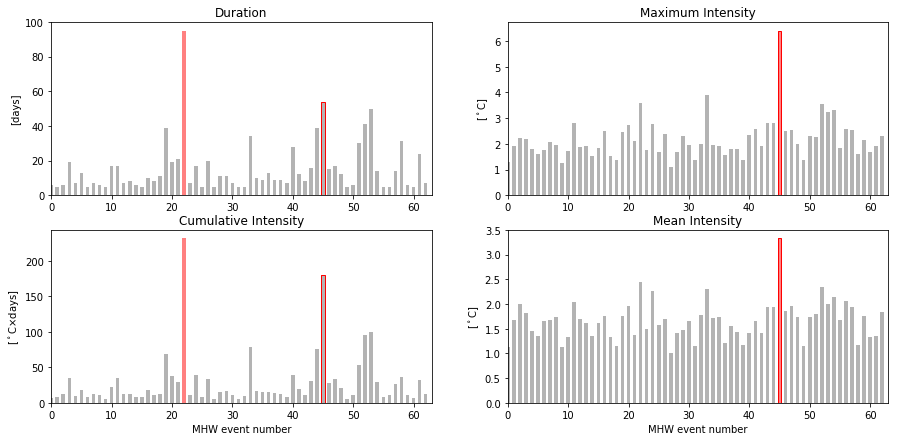

In [8]:
plt.figure(figsize=(15,7))
# Duration
plt.subplot(2,2,1)
evMax = np.argmax(mhws['duration'])
plt.bar(range(mhws['n_events']), mhws['duration'], width=0.6, \
        color=(0.7,0.7,0.7))
plt.bar(evMax, mhws['duration'][evMax], width=0.6, color=(1,0.5,0.5))
plt.bar(ev, mhws['duration'][ev], width=0.6, edgecolor=(1,0.,0.), \
        color='none')
plt.xlim(0, mhws['n_events'])
plt.ylabel('[days]')
plt.title('Duration')
# Maximum intensity
plt.subplot(2,2,2)
evMax = np.argmax(mhws['intensity_max'])
plt.bar(range(mhws['n_events']), mhws['intensity_max'], width=0.6, \
        color=(0.7,0.7,0.7))
plt.bar(evMax, mhws['intensity_max'][evMax], width=0.6, color=(1,0.5,0.5))
plt.bar(ev, mhws['intensity_max'][ev], width=0.6, edgecolor=(1,0.,0.), \
        color='none')
plt.xlim(0, mhws['n_events'])
plt.ylabel(r'[$^\circ$C]')
plt.title('Maximum Intensity')
# Mean intensity
plt.subplot(2,2,4)
evMax = np.argmax(mhws['intensity_mean'])
plt.bar(range(mhws['n_events']), mhws['intensity_mean'], width=0.6, \
        color=(0.7,0.7,0.7))
plt.bar(evMax, mhws['intensity_mean'][evMax], width=0.6, color=(1,0.5,0.5))
plt.bar(ev, mhws['intensity_mean'][ev], width=0.6, edgecolor=(1,0.,0.), \
        color='none')
plt.xlim(0, mhws['n_events'])
plt.title('Mean Intensity')
plt.ylabel(r'[$^\circ$C]')
plt.xlabel('MHW event number')
# Cumulative intensity
plt.subplot(2,2,3)
evMax = np.argmax(mhws['intensity_cumulative'])
plt.bar(range(mhws['n_events']), mhws['intensity_cumulative'], width=0.6, \
        color=(0.7,0.7,0.7))
plt.bar(evMax, mhws['intensity_cumulative'][evMax], width=0.6, color=(1,0.5,0.5))
plt.bar(ev, mhws['intensity_cumulative'][ev], width=0.6, edgecolor=(1,0.,0.), \
        color='none')
plt.xlim(0, mhws['n_events'])
plt.title(r'Cumulative Intensity')
plt.ylabel(r'[$^\circ$C$\times$days]')
plt.xlabel('MHW event number')

The largest event on record by maximum intensity and mean intensity (shown by red shaded bars) and the second largest by duration and cumulative intensity happens to be the 2011 event (red outlined bars).

## References

Stéfan van der Walt, S. Chris Colbert and Gaël Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22-30 (2011), DOI:10.1109/MCSE.2011.37

Fernando Pérez and Brian E. Granger. IPython: A System for Interactive Scientific Computing, Computing in Science & Engineering, 9, 21-29 (2007), DOI:10.1109/MCSE.2007.53

John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55

Reynolds, Richard W., Thomas M. Smith, Chunying Liu, Dudley B. Chelton, Kenneth S. Casey, Michael G. Schlax, 2007: Daily High-Resolution-Blended Analyses for Sea Surface Temperature. J. Climate, 20, 5473-5496. Reynolds, Richard W., Thomas M. Smith, Chunying Liu, Dudley B. Chelton, Kenneth S. Casey, Michael G. Schlax, 2007: Daily High-Resolution-Blended Analyses for Sea Surface Temperature. J. Climate, 20, 5473-5496.

Hobday, A.J. et al. (2016), A hierarchical approach to defining marine heatwaves, Progress in Oceanography, 141, pp. 227-238, doi: 10.1016/j.pocean.2015.12.014

Oliver, E. C. J., Benthuysen, J. A., Bindoff, N. L., Hobday, A. J., Holbrook, N. J., Mundy, C. N., et al. (2017). The unprecedented 2015/16 Tasman Sea marine heatwave. Nat. Commun. 8:16101. doi: 10.1038/ncomms16101

Benthuysen, J., Feng, M., Zhong, L., 2014. Spatial patterns of warming off Western Australia during the 2011 Ningaloo Niño: quantifying impacts of remote and local forcing. Continental Shelf Research 91, 232–246.

Feng, M., McPhaden, M.J., Xie, S.-P., Hafner, J., 2013. La Niña forces unprecedented Leeuwin Current warming in 2011. Scientific Reports 3, 1277. http://dx.doi.org/10.1038/srep01277

Caputi, N., Feng, M., Pearce, A., Benthuysen, J., Denham, A., Hetzel, Y., Matear, R., Jackson, G., Molony, B., Joll, L., Chandrapavan, A., 2015. Management implications of climate change effect on fisheries in Western Australia. FRDC Project 2010/535. Fisheries Research Report No. 260, Department of Fisheries, Western Australia, 180 pp.

Smale, D.A., Wernberg, T., 2013. Extreme climatic event drives range contraction of a habitat-forming species. Proceedings of the Royal Society of London, Series B: Biological Sciences 280, 20122829. http://dx.doi.org/10.1098/rspb.2012.2829

Wernberg, T., Smale, D.A.,Tuya, F., Thomsen,M.S.,Langlois, T.J.,de Bettignies,T., Bennett, S., Rousseaux, C.S., 2013. An extreme climatic event alters marine ecosystem structure in a global biodiversity hotspot. Nature Climate Change 3, 78–82